In [6]:
import cv2 as cv
import cv2
import os
from PIL import Image, ImageDraw
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import rawpy
import imageio
from pyscikit import ImgKit
import tqdm
# import exiftool
import math



In [7]:
def alignImages(im1, im2):

  # Convert images to grayscale
  im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
  im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
#   im2Gray = im2
  
  # Detect ORB features and compute descriptors.
  orb = cv2.ORB_create(MAX_MATCHES)
  keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
  keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)
  
  # Match features.
  matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
  matches = matcher.match(descriptors1, descriptors2, None)
  
  # Sort matches by score
  matches.sort(key=lambda x: x.distance, reverse=False)

  # Remove not so good matches
  numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
  matches = matches[:numGoodMatches]

  # Draw top matches
  imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
  cv2.imwrite("matches.jpg", imMatches)
  
  # Extract location of good matches
  points1 = np.zeros((len(matches), 2), dtype=np.float32)
  points2 = np.zeros((len(matches), 2), dtype=np.float32)

  for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt
  
  # Find homography
  h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

  # Use homography
  height, width, channels = im1.shape
  im1Reg = cv2.warpPerspective(im1, h, (width, height))
  
  return im1Reg, h
def alignImages2(im1, im2,rawim):#im2-> reference

  # Convert images to grayscale
  im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
#   im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
  im2Gray = im2
  
  # Detect ORB features and compute descriptors.
  orb = cv2.ORB_create(MAX_MATCHES)
  keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
  keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)
  
  # Match features.
  matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
  matches = matcher.match(descriptors1, descriptors2, None)
  
  # Sort matches by score
  matches.sort(key=lambda x: x.distance, reverse=False)

  # Remove not so good matches
  numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
  matches = matches[:numGoodMatches]

  # Draw top matches
  imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
  cv2.imwrite("matches.jpg", imMatches)
  
  # Extract location of good matches
  points1 = np.zeros((len(matches), 2), dtype=np.float32)
  points2 = np.zeros((len(matches), 2), dtype=np.float32)

  for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt
  
  # Find homography
  h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

  # Use homography
  height, width, channels = im2.shape
  im1Reg = cv2.warpPerspective(im1, h, (width, height))
  rawimReg = cv2.warpPerspective(rawim, h, (width, height))
  
  return im1Reg,rawimReg, h


- (:, :, 0) represents Blue channel
- (:, :, 1) represents Green channel
- (:, :, 2) represents Red channel
- (:, :, 3) represents Transparency channel

OpenCV uses BGR as its default colour order for images, matplotlib uses RGB. When you display an image loaded with OpenCv in matplotlib the channels will be back to front.

The easiest way of fixing this is to use OpenCV to explicitly convert it back to RGB, much like you do when creating the greyscale image.

RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

And then use that in your plot.


In [8]:
# filepath = 'C:/Users/Xingbo/OneDrive/Pictures/firstai.png'

# im = Image.open(filepath)
# filedemo = np.array(im)
# # filedemo = cv2.imread(filepath)
# # filedemo = cv2.cvtColor(filedemo, cv2.COLOR_BGR2RGB)
# print(im.size)

# canvas = ImgKit.displayImages([filedemo],1,10,img_size=(268,328))

In [28]:
#  # Read reference image
#   refFilename = "form.jpg"
#   print("Reading reference image : ", refFilename)
#   imReference = cv2.imread(refFilename, cv2.IMREAD_COLOR)

#   # Read image to be aligned
#   imFilename = "scanned-form.jpg"
#   print("Reading image to align : ", imFilename);  
#   im = cv2.imread(imFilename, cv2.IMREAD_COLOR)

# /media/charles/SSD/TCL/taleoftwocams/data/20210714AM_DUAL/C00012_24mp_0x8_0x00ff.dng
to_be_regiester = '/media/charles/SSD/TCL/taleoftwocams/data/20210714AM_DUAL/M00012_24mp_0x8_0x0fff.jpg'
reference_img = '/media/charles/SSD/TCL/taleoftwocams/data/20210714AM_DUAL/C00012_24mp_0x8_0x0fff.jpg'
raw = np.fromfile('/media/charles/SSD/TCL/taleoftwocams/data/20210714AM_DUAL/M00012_24mp_0x8_0x0fff.raw', dtype=np.uint8)
raw = np.reshape(raw,(1024,1280,1))

rgb_raw = np.fromfile('/media/charles/SSD/TCL/taleoftwocams/data/20210714AM_DUAL/C00012_24mp_0x8_0x0fff.raw', dtype=np.uint8)
rgb_raw = np.reshape(rgb_raw,(1024,1280))

MAX_MATCHES = 500
GOOD_MATCH_PERCENT = 0.15

rgb_im = np.array(Image.open(reference_img))
gray_im = np.array(Image.open(to_be_regiester))

# gray_im = cv2.imread(reference_img)
# rgb_im = cv2.imread(to_be_regiester)


In [62]:

# print("Aligning images ...")
  # Registered image will be resotred in imReg. 
  # The estimated homography will be stored in h. 
# imReg, h = alignImages(gray_im, rgb_im)
# imReg,rawReg, h = alignImages2(rgb_im,gray_im,raw)
  
  # Write aligned image to disk. 
# outFilename = "aligned.jpg"
# print("Saving aligned image : ", outFilename); 
# cv2.imwrite(outFilename, imReg)

#   # Print estimated homography
# print("Estimated homography : \n",  h)
# print(imReg.shape)
# img = Image.fromarray(imReg)
# display(img)

In [22]:
import IPython
import PIL
def displayImages(imgs,rows,cols,png = 'output.png',img_size=(128,128), display_width = 1024):
    if imgs is None or len(imgs) == 0:
        print('no imgs')
        return
    if rows * cols < len(imgs):
        print('rows,cols incorrect')
    w = imgs[0].size[0] #dim of img
    h = imgs[0].size[1]
    channel = 1#imgs[0].size[2]
    canvas_w = w * cols
    canvas_h = h * rows
    canvas = PIL.Image.new('RGB', (canvas_w, canvas_h ), 'white')
    col = row = 0
    for i in range(len(imgs)):
        row,col = np.unravel_index(i, (rows,cols))
        tmp = imgs[i]
        canvas.paste(tmp, (col * w, row * h))
    canvas.save(png)
    IPython.display.display(IPython.display.Image(png, width=display_width))
    return canvas

```
[R11,R12,T1]
[R21,R22,T2]
[ P , P , 1]
```

```
[ 1 , 0 , x_offset]
[ 0 , 1 , y_offset]
[ 0 , 0 ,    1    ]
```

(1024, 1280, 3)
(1024, 1280, 3)
(1024, 1280, 3)
(1024, 1280)
(1024, 1280)
Estimated homography : 
 [[-9.98573123e-01  1.90085896e-03  1.20607562e+03]
 [-4.62562893e-02 -9.89456145e-01  1.03300978e+03]
 [-1.17044210e-05 -4.48928519e-07  1.00000000e+00]]


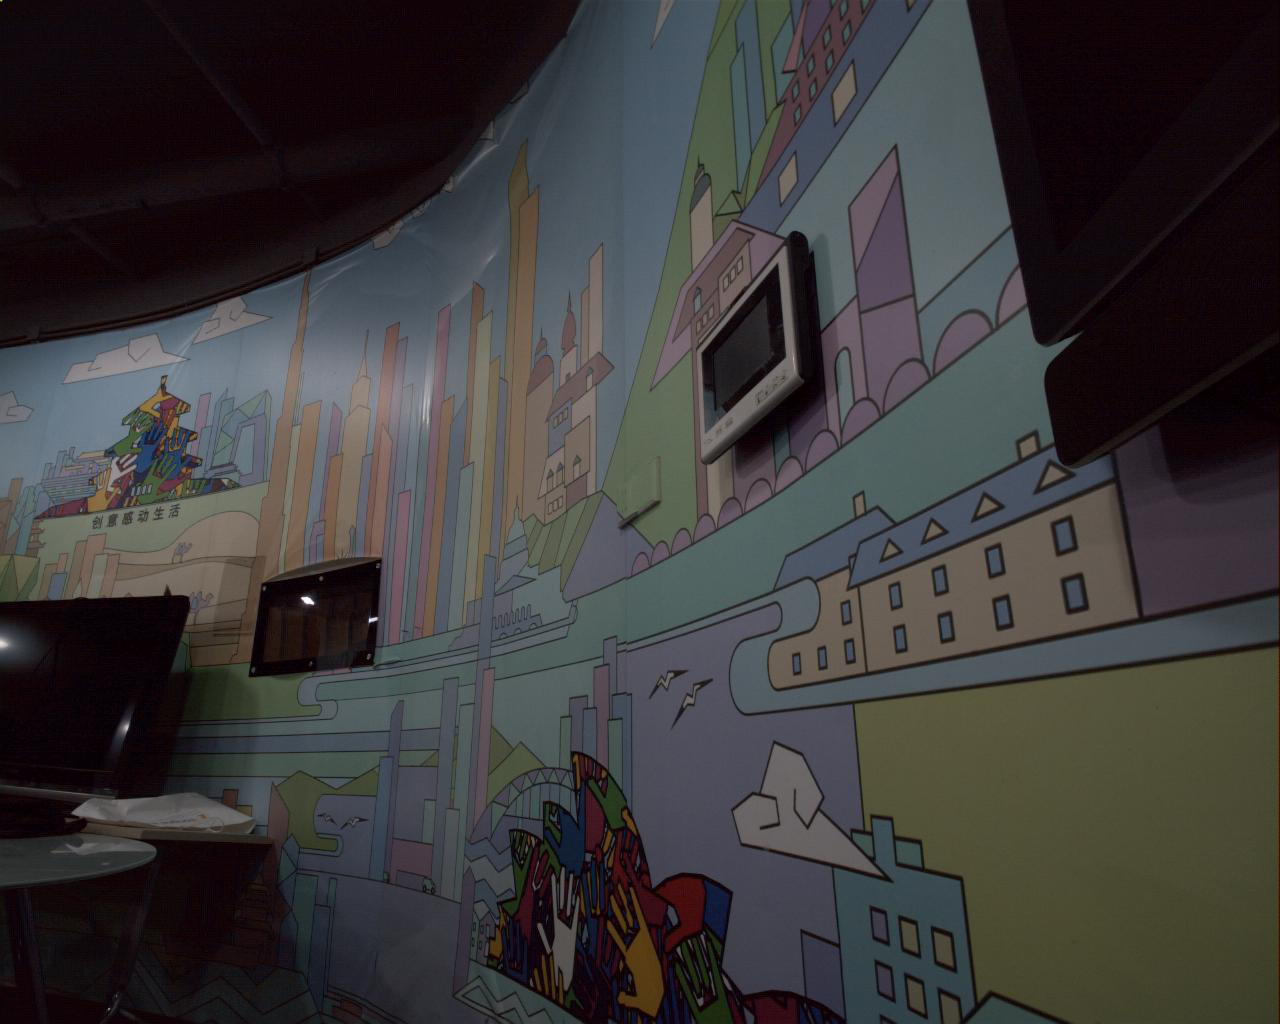

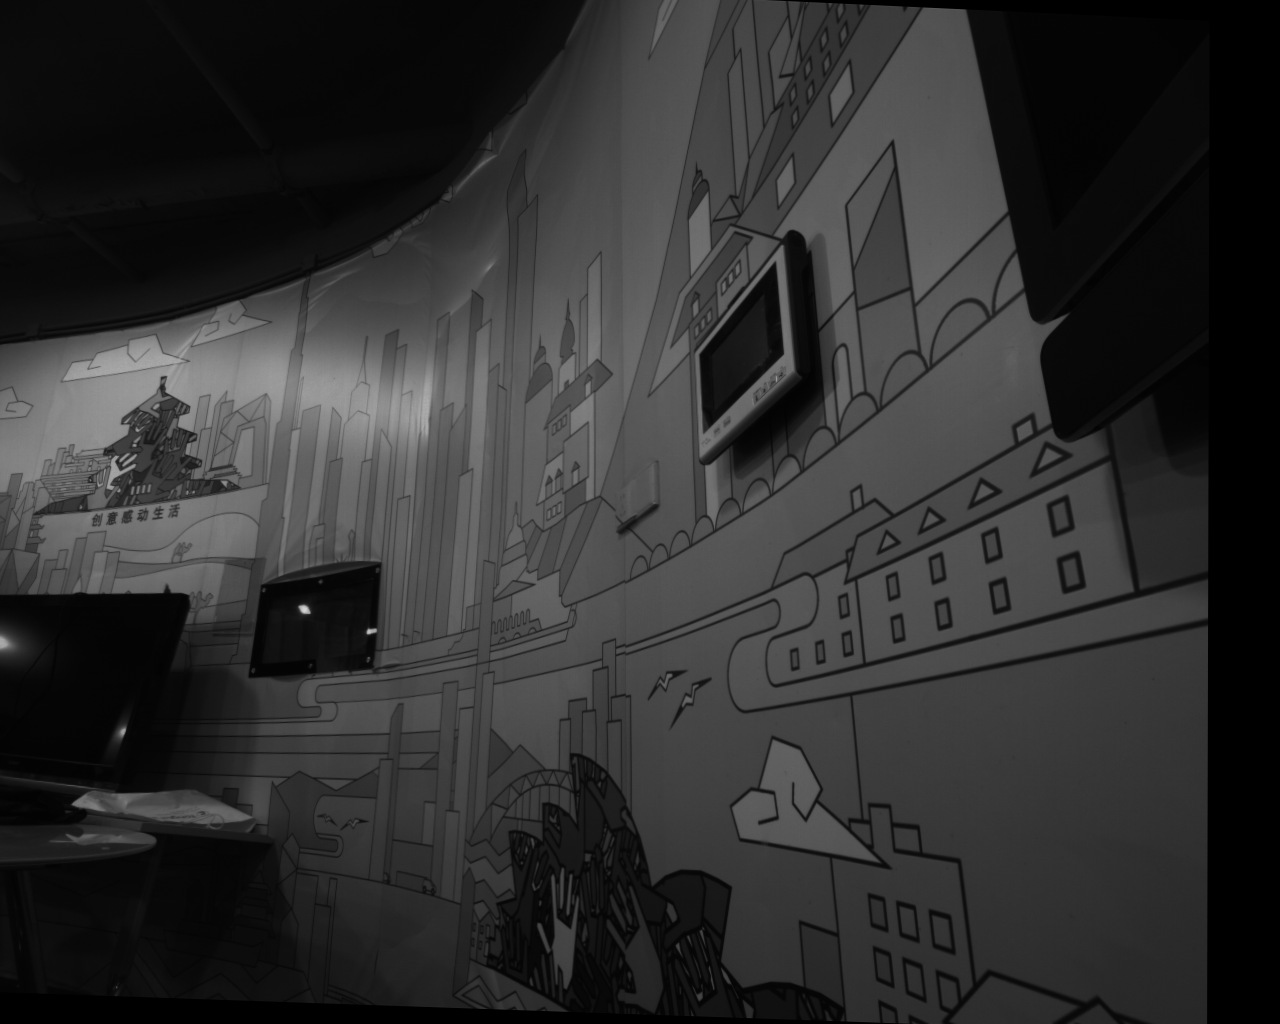

In [30]:
# rawReg = np.expand_dims(rawReg,2)
imReg, h1 = alignImages(gray_im,rgb_im) # to be reg, reference, raw to be reg
imReg,rawReg, h = alignImages2(gray_im,rgb_im,raw) # to be reg, reference, raw to be reg
print(gray_im.shape)
print(rgb_im.shape)
print(imReg.shape)
print(rawReg.shape)
print(rgb_raw.shape)
# canvas = ImgKit.displayImages([rgb_im,rgb_raw,gray_im,imReg,rawReg],1,5,img_size=(1280,1024))# w h
print("Estimated homography : \n",  h)
# print(rawReg.shape)
img = Image.fromarray(rgb_im)
display(img)
# print(h[0][2])
# print(h[1][2])
# x_offset = h[0][2]
# y_offset = h[1][2]
IMG = Image.fromarray(rawReg)
# IMG.save('rawReg.tif')
IMG

In [12]:
 # Use homography
    
rgb_raw1 = np.fromfile('/media/charles/SSD/TCL/taleoftwocams/data/20210714AM_DUAL/M00012_24mp_0x8_0x00ff.raw', dtype=np.uint8)
rgb_raw1 = np.reshape(rgb_raw1,(1024,1280))

height, width, channels = rgb_im.shape
rawimReg2 = cv2.warpPerspective(rgb_raw1, h, (width, height))
  

In [13]:
canvas = ImgKit.displayImages([rgb_im,rgb_raw,gray_im,imReg,rawReg,rawimReg2],1,6,img_size=(1280,1024))# w h


ValueError: not enough image data

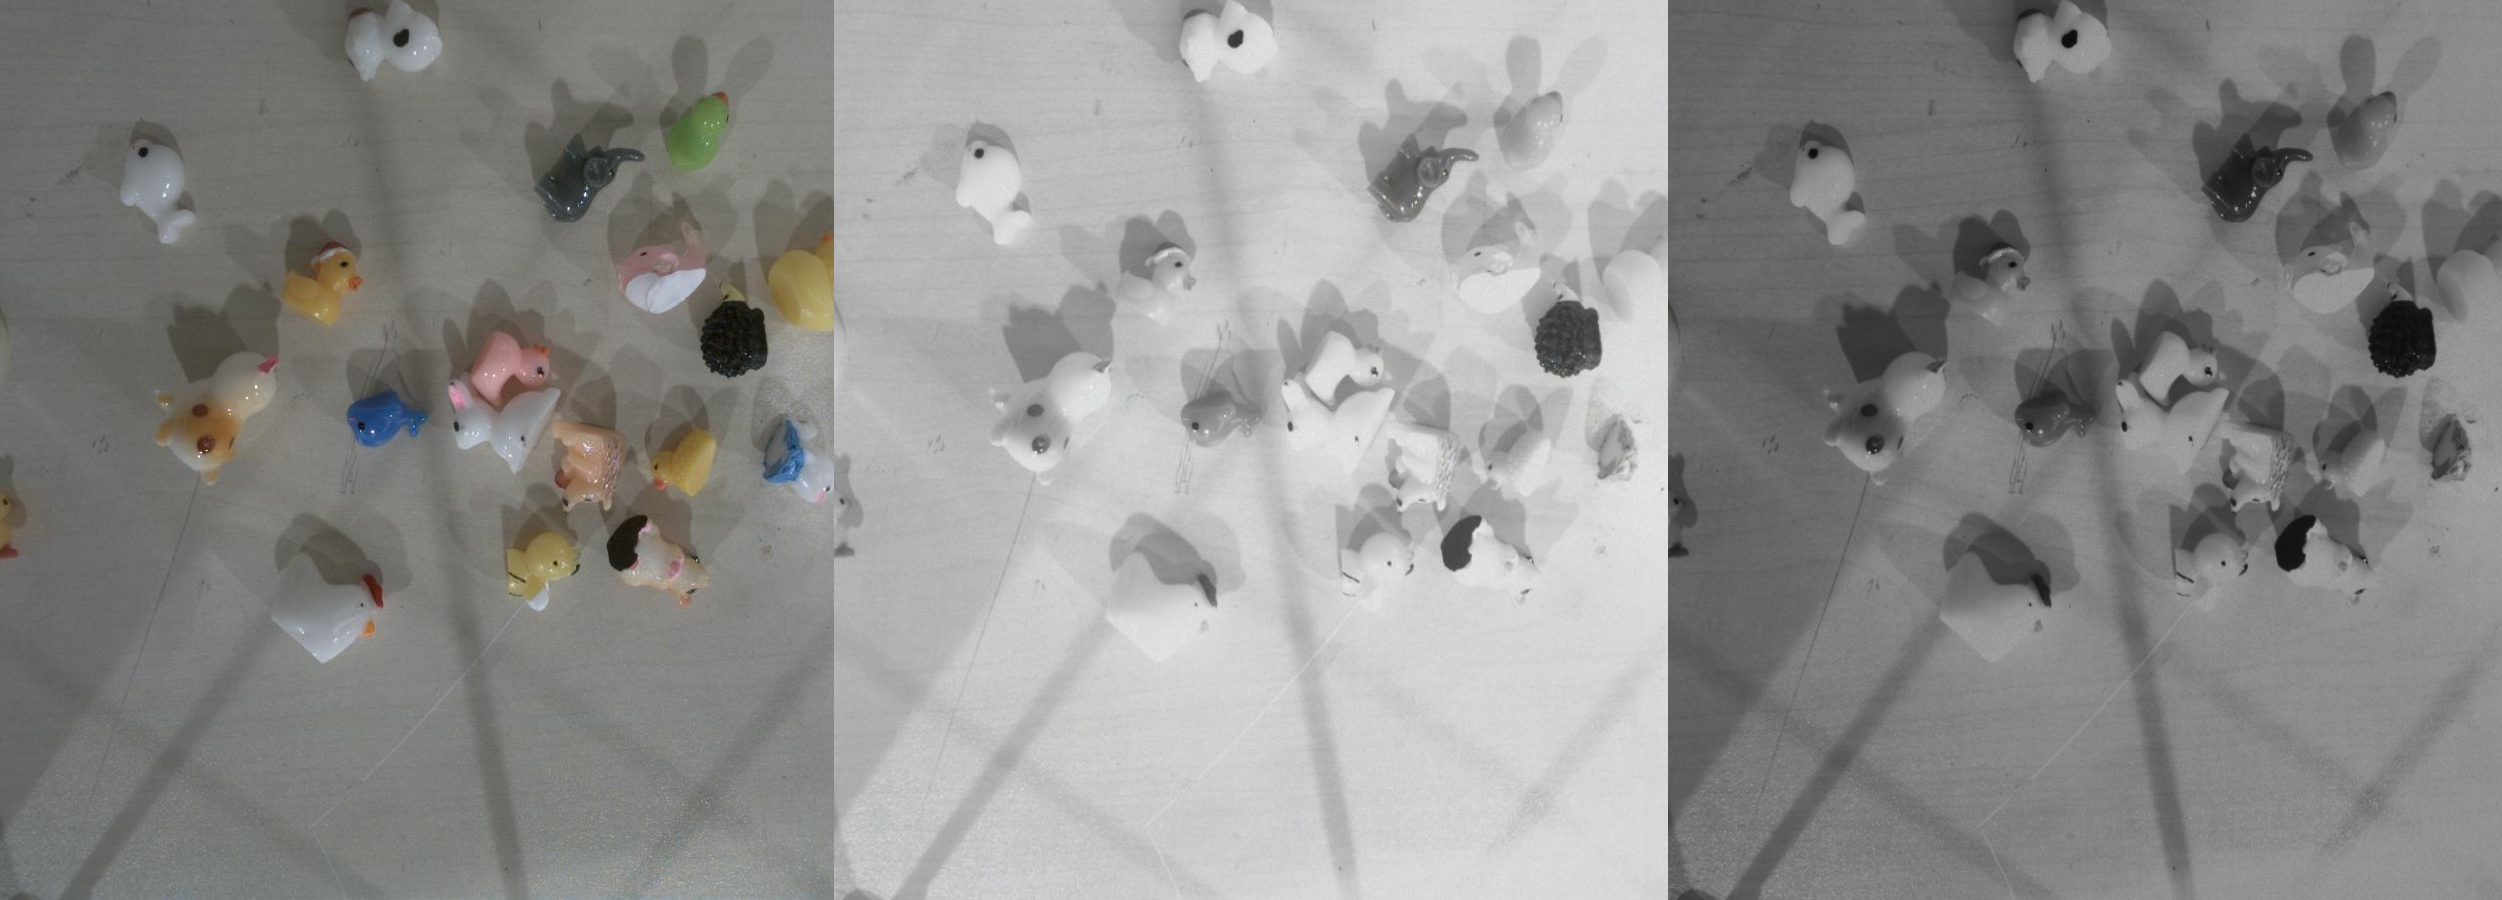

In [81]:
# Crop 
# x, y, w, h = math.ceil(abs(x_offset))+2,math.ceil(abs(y_offset))+2,900,900
x, y, w, h =62,190,900,900

rgb_im_croped = rgb_im[y:y+h, x:x+w]
imReg_croped = imReg[y:y+h, x:x+w]
rawReg_croped = rawReg[y:y+h, x:x+w]

canvas = ImgKit.displayImages([rgb_im_croped,imReg_croped,rawReg_croped],1,3,img_size=(900,900))# w h
# PIL.Image.fromarray(rgb_im_croped).save()



In [ ]:
MAX_MATCHES = 500
GOOD_MATCH_PERCENT = 0.15
dirpath = '/media/charles/SSD/TCL/taleoftwocams/data/20210714AM_DUAL/'
CLK = '24mp'
my_files = [f.name for f in os.scandir(dirpath) if
                f.name.endswith('.raw') and f.name.startswith('M')]
for one in tqdm.tqdm(range(1,16)):
   
    
    to_be_regiester = dirpath + 'M{:0>5d}_{}_0x8_0x1fff.jpg'.format(one,CLK)
    reference_img = dirpath + 'C{:0>5d}_{}_0x8_0x1fff.jpg'.format(one,CLK)
    
#      print("{:0>5d}".format(14))
    rgb_im = np.array(Image.open(reference_img))
    gray_im = np.array(Image.open(to_be_regiester))
    imReg, h = alignImages(gray_im,rgb_im) # to be reg, reference, raw to be reg
    
    height, width, channels = rgb_im.shape
    
    for expo in ['0x007f','0x00ff','0x01ff','0x03ff','0x07ff','0x0fff','0x1fff','0x2fff']:
        try:
        #Code that may raise an error
            gray_raw = np.fromfile(dirpath  + 'M{:0>5d}_{}_0x8_{}.raw'.format(one,CLK,expo), dtype=np.uint8)
            gray_raw = np.reshape(gray_raw,(1024,1280))
            rawimReg = cv2.warpPerspective(gray_raw, h, (width, height))
            IMG = Image.fromarray(rawimReg)
            IMG.save(dirpath  + 'M_Align_{:0>5d}_{}_0x8_{}.tif'.format(one,CLK,expo))
        #Raising your own errors
#             raise ErrorType("Error message")
        except Exception as e: #code to run if error occurs
        #code to run if error is raised
            print(dirpath  + 'M{:0>5d}_{}_0x8_{}.raw'.format(one,CLK,expo),"ERROR",e)
            pass
        else:
            pass
        #code to run if no error is raised
       
    

 67%|██████▋   | 10/15 [00:01<00:00,  7.64it/s]